<a href="https://colab.research.google.com/github/bhuvana1487/Credit-Card-Approval-Prediction/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Title: Credit Card Fraud Detection**

Develop a machine learning (ML) model to detect fraudulent credit card transactions in real-time, improving security and reducing financial losses.

**Problem statement**

* Transaction amount

* Merchant category

* Cardholder information

* Transaction location

**Target Variable**: Is_Fraudulent (Binary: Fraud / Non-Fraud)

## **1) EDA (Exploratory Data Analysis)**


**Data Exploration**


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

**Load the dataset**

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/ArchanaInsights/Datasets/refs/heads/main/credit_card_transactions.csv")
print("Shape after loading:", df.shape)

df['Is_Fraudulent'] = df['Is_Fraudulent'].map({'Yes': 1, 'No': 0})
df.dropna(subset=['Is_Fraudulent'], inplace=True)
print("Shape after handling Is_Fraudulent NaNs:", df.shape)

df.head()

Shape after loading: (5000, 15)
Shape after handling Is_Fraudulent NaNs: (5000, 15)


,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,W963UK57,Mastercard,Utility bill,27214.0,2020-01-01 09:43:17,Patna,East,23.0,Female,94632.0,36369.65,100000.0,Unknown,Wednesday,0
1,V606KV56,American Express,Retail,83956.0,2020-01-03 16:26:13,Surat,West,49.0,Male,148118.0,89179.12,150000.0,Desktop,Friday,0
2,R531NU70,Visa,Transportation,193280.0,2020-01-04 03:40:49,Patna,East,NaN,Male,210921.0,106668.60,200000.0,Desktop,Saturday,0
3,T783GF79,RuPay,Online Shopping,167381.0,2020-01-04 14:56:24,Surat,West,52.0,Female,148070.0,173155.52,200000.0,Desktop,Saturday,1
4,K256ZN73,RuPay,Retail,81170.0,2020-01-04 17:26:47,Lucknow,North,37.0,Female,174470.0,52713.09,200000.0,Mobile,Saturday,0


In [ ]:
df.tail()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
4995,N307EM82,RuPay,Education,36508.0,2023-12-29 09:22:23,Delhi,North,33.0,Female,63015.0,34192.55,50000.0,Contactless Payment Device,Friday,1
4996,J752EG45,American Express,Online Shopping,42920.0,2023-12-29 19:59:13,Chennai,South,NaN,Female,NaN,19680.39,100000.0,Contactless Payment Device,Friday,0
4997,S458OS59,Visa,Healthcare,33788.0,2023-12-30 07:06:38,Pune,West,56.0,Male,60868.0,33876.96,50000.0,Desktop,Saturday,0
4998,E863PD98,RuPay,Entertainment,38679.0,2023-12-30 07:50:02,Chennai,South,60.0,Male,66948.0,32988.22,50000.0,Desktop,Saturday,0
4999,D501WH15,Visa,Healthcare,34672.0,2023-12-30 11:41:36,Jaipur,North,60.0,NaN,58261.0,39412.26,50000.0,Mobile,Saturday,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Transaction_ID             5000 non-null   object 
 1   Card_Type                  4983 non-null   object 
 2   Merchant_Category          4978 non-null   object 
 3   Transaction_Amount         4994 non-null   float64
 4   Transaction_DateTime       5000 non-null   object 
 5   Location                   5000 non-null   object 
 6   Region                     5000 non-null   object 
 7   Cardholder_Age             4865 non-null   float64
 8   Cardholder_Gender          4911 non-null   object 
 9   Cardholder_Monthly_Income  4686 non-null   float64
 10  Cardholder_Average_Spend   4792 non-null   float64
 11  Credit_Limit               4991 non-null   float64
 12  Device_Type                4960 non-null   object 
 13  Day_of_Week                5000 non-null   objec

In [ ]:
df.describe()

,Transaction_Amount,Cardholder_Age,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Is_Fraudulent
count,4994.000000,4865.000000,4686.000000,4792.000000,4991.000000,5000.00000
mean,74667.995995,49.106680,137353.817542,63058.343566,124654.377880,0.26640
std,43089.045623,18.398524,69471.623020,40056.989704,55668.246494,0.44212
min,25008.000000,18.000000,35005.000000,10282.410000,50000.000000,0.00000
25%,39742.500000,33.000000,73485.000000,33336.742500,100000.000000,0.00000
50%,60922.000000,49.000000,131833.000000,49547.945000,100000.000000,0.00000
75%,98373.500000,65.000000,189054.250000,83732.352500,150000.000000,1.00000
max,199923.000000,80.000000,299907.000000,199898.290000,200000.000000,1.00000


In [ ]:
df.isna()

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isna().sum()

,0
Transaction_ID,0
Card_Type,17
Merchant_Category,22
Transaction_Amount,6
Transaction_DateTime,0
Location,0
Region,0
Cardholder_Age,135
Cardholder_Gender,89
Cardholder_Monthly_Income,314


In [ ]:
df.columns

Index(['Transaction_ID', 'Card_Type', 'Merchant_Category',
       'Transaction_Amount', 'Transaction_DateTime', 'Location', 'Region',
       'Cardholder_Age', 'Cardholder_Gender', 'Cardholder_Monthly_Income',
       'Cardholder_Average_Spend', 'Credit_Limit', 'Device_Type',
       'Day_of_Week', 'Is_Fraudulent'],
      dtype='object')

In [ ]:
print(df.isnull().sum())

Transaction_ID                 0
Card_Type                     17
Merchant_Category             22
Transaction_Amount             6
Transaction_DateTime           0
Location                       0
Region                         0
Cardholder_Age               135
Cardholder_Gender             89
Cardholder_Monthly_Income    314
Cardholder_Average_Spend     208
Credit_Limit                   9
Device_Type                   40
Day_of_Week                    0
Is_Fraudulent                  0
dtype: int64


In [ ]:
df.shape

(5000, 15)

In [ ]:
df.select_dtypes(include= 'object').columns

Index(['Transaction_ID', 'Card_Type', 'Merchant_Category',
       'Transaction_DateTime', 'Location', 'Region', 'Cardholder_Gender',
       'Device_Type', 'Day_of_Week'],
      dtype='object')

###**A) Distribution of categorical features**

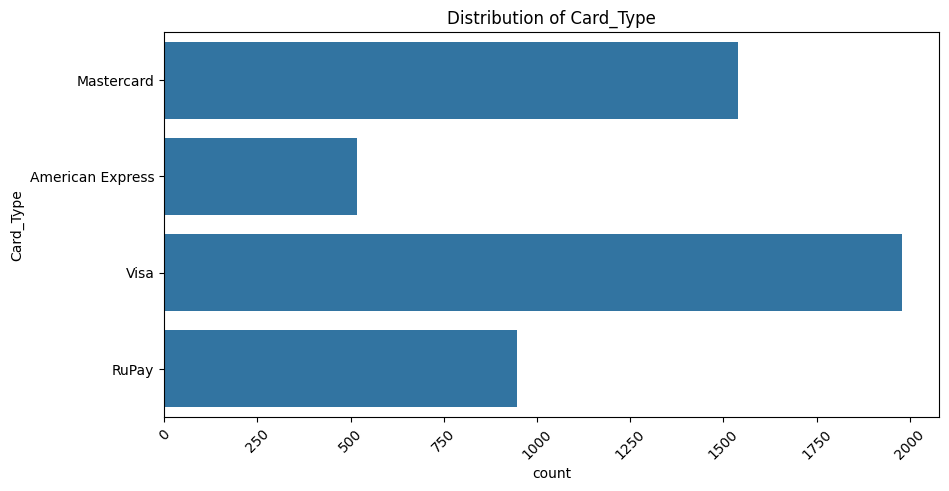

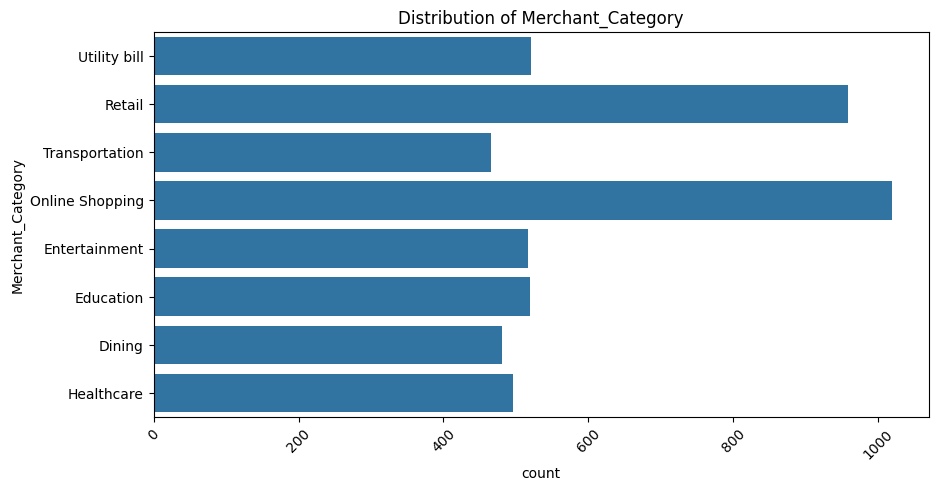

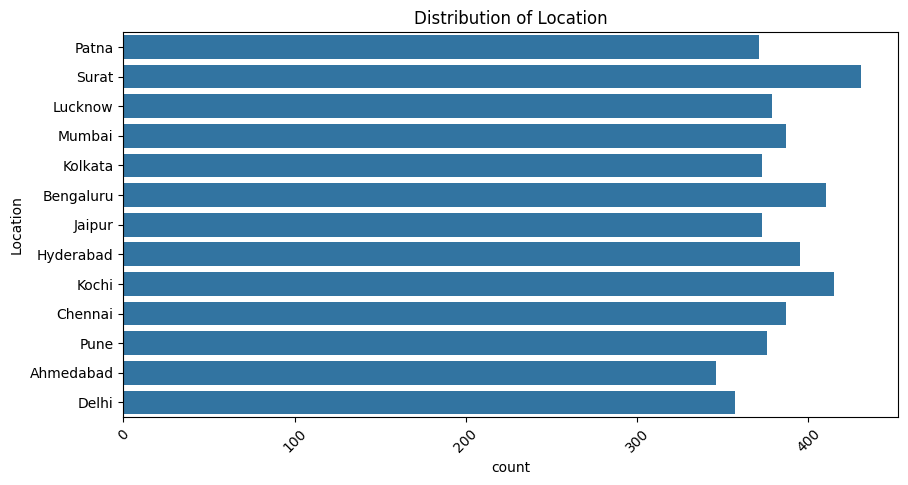

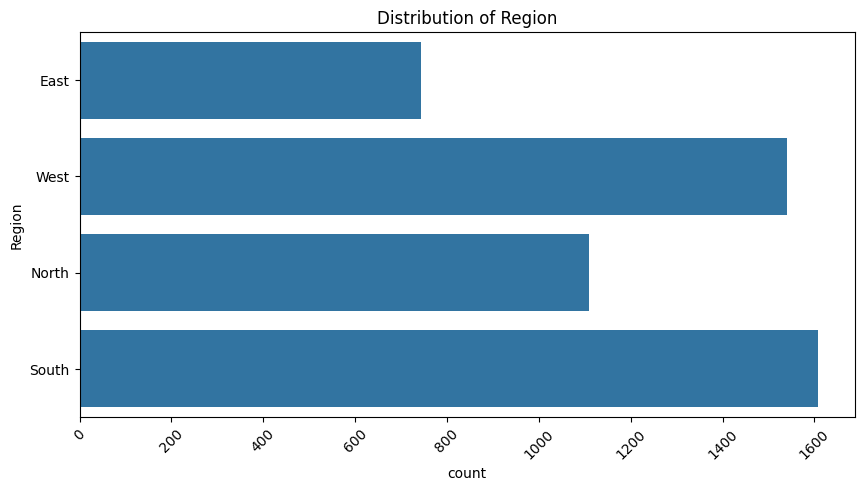

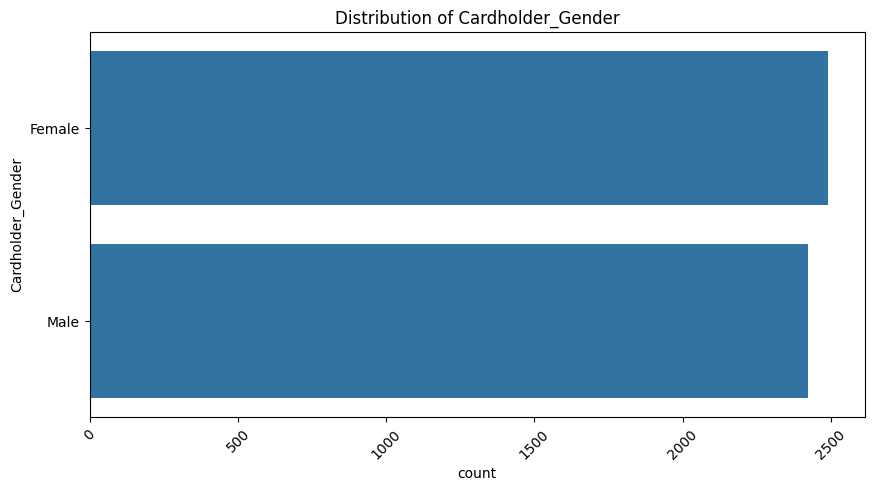

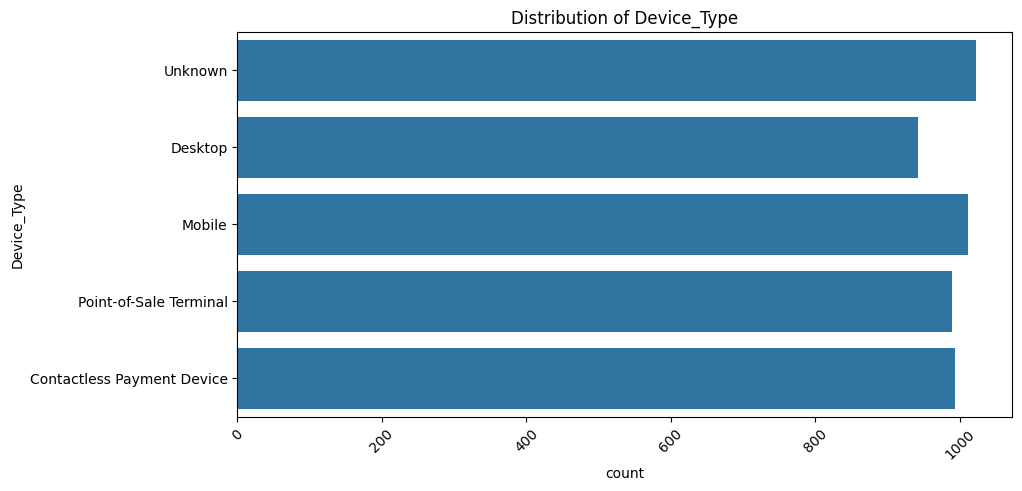

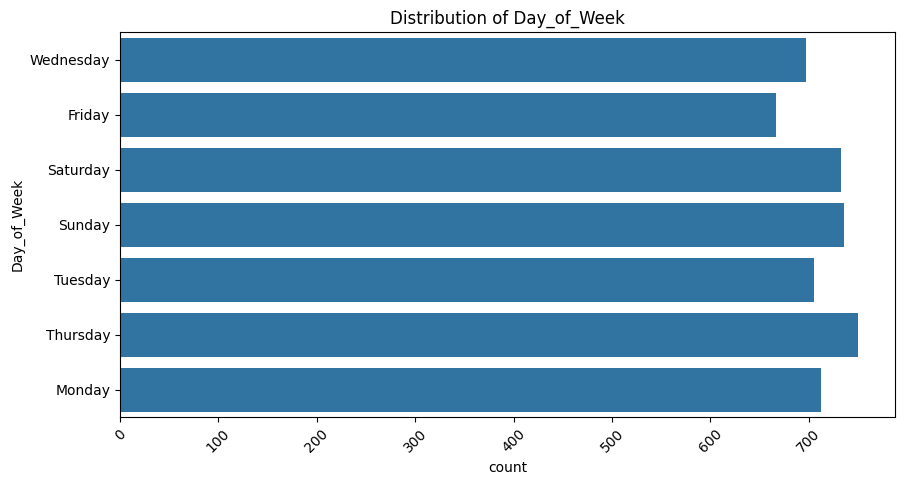

In [ ]:
categorical_features = ['Card_Type', 'Merchant_Category', 'Location', 'Region', 'Cardholder_Gender', 'Device_Type', 'Day_of_Week']
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(df[feature])
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.show()

### **B) Numerical features**

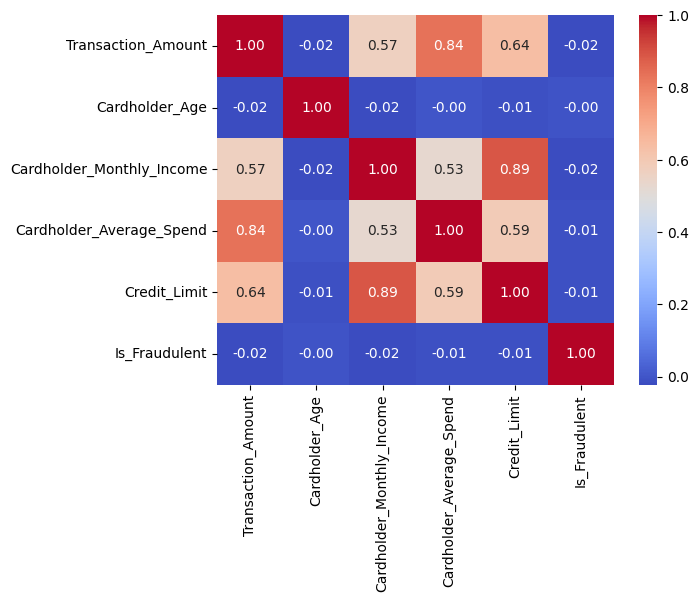

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [ ]:
numerical_features = ['Transaction_Amount', 'Cardholder_Age', 'Cardholder_Monthly_Income', 'Cardholder_Average_Spend']
df[numerical_features].describe()

,Transaction_Amount,Cardholder_Age,Cardholder_Monthly_Income,Cardholder_Average_Spend
count,4994.000000,4865.000000,4686.000000,4792.000000
mean,74667.995995,49.106680,137353.817542,63058.343566
std,43089.045623,18.398524,69471.623020,40056.989704
min,25008.000000,18.000000,35005.000000,10282.410000
25%,39742.500000,33.000000,73485.000000,33336.742500
50%,60922.000000,49.000000,131833.000000,49547.945000
75%,98373.500000,65.000000,189054.250000,83732.352500
max,199923.000000,80.000000,299907.000000,199898.290000


**Visualize distributions**

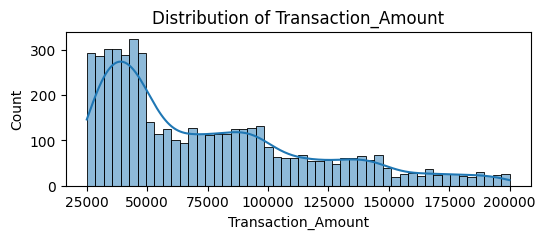

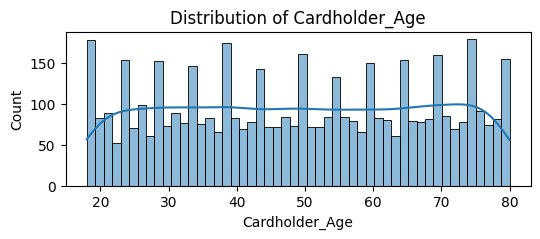

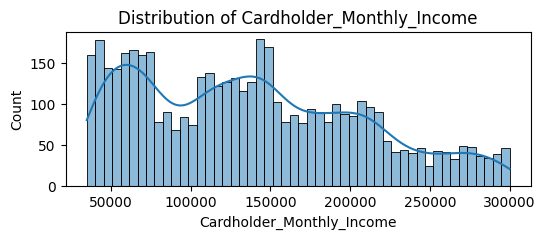

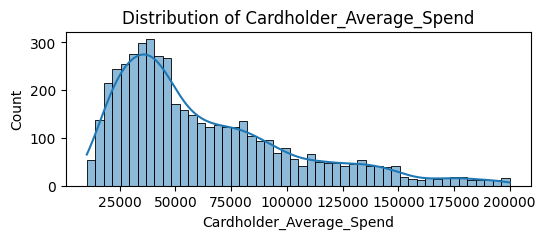

In [ ]:
for feature in numerical_features:
  plt.figure(figsize=(6, 2))
  sns.histplot(df[feature], bins=50, kde=True)
  plt.title(f"Distribution of {feature}")
  plt.show()

### **C) Bi variate and Multi variate Analysis**

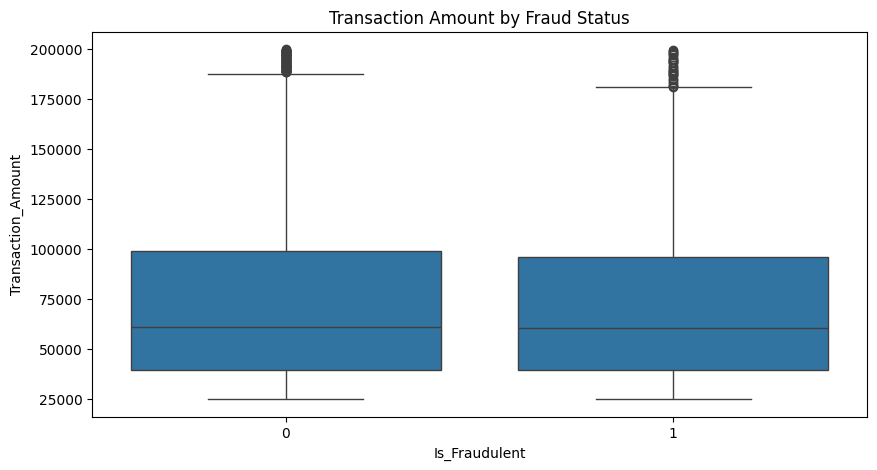

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Is_Fraudulent', y='Transaction_Amount', data=df)
plt.title('Transaction Amount by Fraud Status')
plt.show()

### **D) Visualize the Distribution of Transaction Amounts**

/tmp/ipython-input-380-2305687606.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


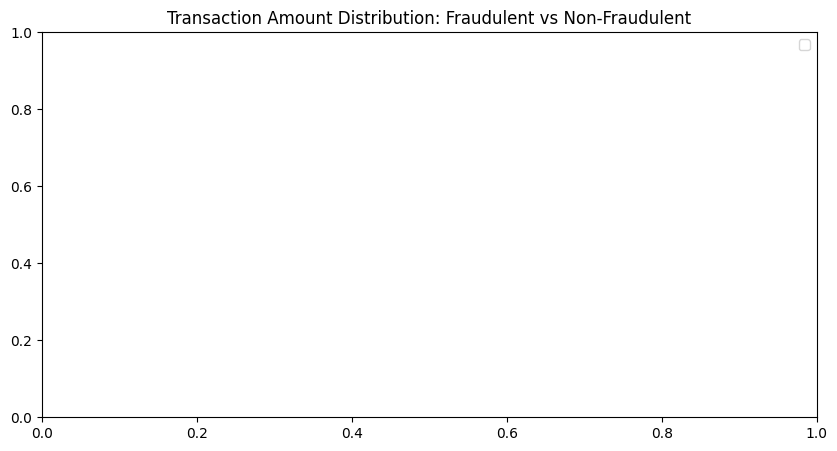

In [ ]:
plt.figure(figsize=(10, 5))
hist_fraud=sns.histplot(df[df['Is_Fraudulent'] == 'Yes']['Transaction_Amount'], bins=30, color='red', label='Fraudulent', kde=True)
hist_non_fraud= sns.histplot(df[df['Is_Fraudulent'] == 'No']['Transaction_Amount'], bins=30, color='blue', label='Non-Fraudulent', kde=True)
sns.histplot(df[df['Is_Fraudulent'] == 'Yes']['Transaction_Amount'], bins=30, color='red', label='Fraudulent', kde=True)
sns.histplot(df[df['Is_Fraudulent'] == 'No']['Transaction_Amount'], bins=30, color='blue', label='Non-Fraudulent', kde=True)
plt.title('Transaction Amount Distribution: Fraudulent vs Non-Fraudulent')
plt.legend()
plt.show()

**Fraudulent Vs Non-fraudulent transactions**

In [ ]:
print(df.dtypes)

Transaction_ID                object
Card_Type                     object
Merchant_Category             object
Transaction_Amount           float64
Transaction_DateTime          object
Location                      object
Region                        object
Cardholder_Age               float64
Cardholder_Gender             object
Cardholder_Monthly_Income    float64
Cardholder_Average_Spend     float64
Credit_Limit                 float64
Device_Type                   object
Day_of_Week                   object
Is_Fraudulent                  int64
dtype: object


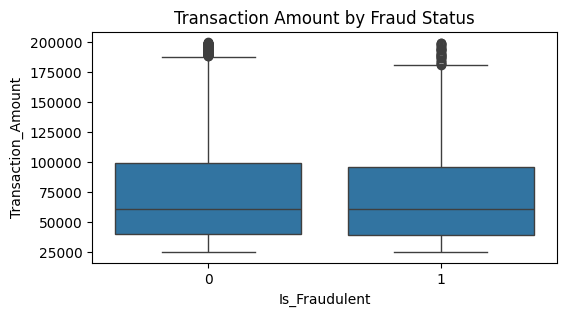

In [ ]:
plt.figure(figsize=(6, 3))
sns.boxplot(x='Is_Fraudulent', y='Transaction_Amount', data=df)
plt.title('Transaction Amount by Fraud Status')
plt.show()

### **E) Investigate Whether Certain Features are More Susceptible to Fraud**

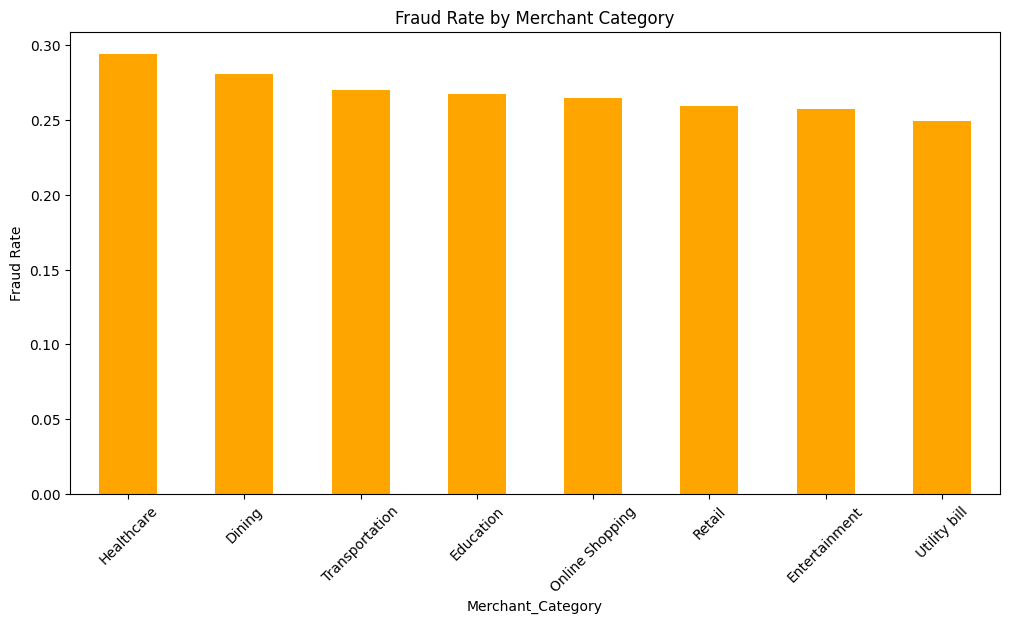

In [ ]:
fraud_rates = df.groupby('Merchant_Category')['Is_Fraudulent'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
fraud_rates.plot(kind='bar', color='orange')
plt.title('Fraud Rate by Merchant Category')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45)
plt.show()

## **2) Data Preprocessing - Data Cleaning**

###**A) Handling missing values**

In [ ]:
df_filled=df.fillna(value=0)
df_filled

,Transaction_ID,Card_Type,Merchant_Category,Transaction_Amount,Transaction_DateTime,Location,Region,Cardholder_Age,Cardholder_Gender,Cardholder_Monthly_Income,Cardholder_Average_Spend,Credit_Limit,Device_Type,Day_of_Week,Is_Fraudulent
0,W963UK57,Mastercard,Utility bill,27214.0,2020-01-01 09:43:17,Patna,East,23.0,Female,94632.0,36369.65,100000.0,Unknown,Wednesday,0
1,V606KV56,American Express,Retail,83956.0,2020-01-03 16:26:13,Surat,West,49.0,Male,148118.0,89179.12,150000.0,Desktop,Friday,0
2,R531NU70,Visa,Transportation,193280.0,2020-01-04 03:40:49,Patna,East,0.0,Male,210921.0,106668.60,200000.0,Desktop,Saturday,0
3,T783GF79,RuPay,Online Shopping,167381.0,2020-01-04 14:56:24,Surat,West,52.0,Female,148070.0,173155.52,200000.0,Desktop,Saturday,1
4,K256ZN73,RuPay,Retail,81170.0,2020-01-04 17:26:47,Lucknow,North,37.0,Female,174470.0,52713.09,200000.0,Mobile,Saturday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,N307EM82,RuPay,Education,36508.0,2023-12-29 09:22:23,Delhi,North,33.0,Female,63015.0,34192.55,50000.0,Contactless Payment Device,Friday,1
4996,J752EG45,American Express,Online Shopping,42920.0,2023-12-29 19:59:13,Chennai,South,0.0,Female,0.0,19680.39,100000.0,Contactless Payment Device,Friday,0
4997,S458OS59,Visa,Healthcare,33788.0,2023-12-30 07:06:38,Pune,West,56.0,Male,60868.0,33876.96,50000.0,Desktop,Saturday,0
4998,E863PD98,RuPay,Entertainment,38679.0,2023-12-30 07:50:02,Chennai,South,60.0,Male,66948.0,32988.22,50000.0,Desktop,Saturday,0


In [ ]:
df['Is_Fraudulent'] = df['Is_Fraudulent'].map({'No': 0, 'Yes': 1})
df.dropna(subset=['Is_Fraudulent'], inplace=True)
df['Is_Fraudulent'] = df['Is_Fraudulent'].astype(int)

**Handle missing values using KNN**

**Select numerical features for imputation, explicitly excluding 'Is_Fraudulent'**

In [ ]:
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
if 'Is_Fraudulent' in numerical_features:
    numerical_features.remove('Is_Fraudulent')

df_numerical = df[numerical_features]

In [ ]:
df_imputed_numerical = pd.DataFrame(df_imputed_numerical, columns=numerical_features, index=df.index)
df[numerical_features] = df_imputed_numerical

**Handle missing values in categorical columns using mode imputation**

In [ ]:
original_numerical_features = ['Transaction_Amount', 'Cardholder_Age', 'Cardholder_Monthly_Income', 'Cardholder_Average_Spend', 'Credit_Limit']
numerical_features_to_impute = [col for col in original_numerical_features if col in df.columns]

df_numerical = df[numerical_features_to_impute]

# Apply KNN imputer to numerical features
imputer = KNNImputer(n_neighbors=5)
df_imputed_numerical = imputer.fit_transform(df_numerical)

df_imputed_numerical = pd.DataFrame(df_imputed_numerical, columns=numerical_features_to_impute, index=df.index)

df[numerical_features_to_impute] = df_imputed_numerical

for col in df.select_dtypes(include= 'object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Transaction_ID             5000 non-null   object 
 1   Card_Type                  5000 non-null   object 
 2   Merchant_Category          5000 non-null   object 
 3   Transaction_Amount         5000 non-null   float64
 4   Transaction_DateTime       5000 non-null   object 
 5   Location                   5000 non-null   object 
 6   Region                     5000 non-null   object 
 7   Cardholder_Age             5000 non-null   float64
 8   Cardholder_Gender          5000 non-null   object 
 9   Cardholder_Monthly_Income  5000 non-null   float64
 10  Cardholder_Average_Spend   5000 non-null   float64
 11  Credit_Limit               5000 non-null   float64
 12  Device_Type                5000 non-null   object 
 13  Day_of_Week                5000 non-null   objec

/tmp/ipython-input-404-2185961083.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


###**Handle outliers using IQR**

**Mode Imputation for Categorical Features**

In [ ]:
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

**Z-score method**

**Check for outliers using IQR**

In [ ]:
Q1 = df['Transaction_Amount'].quantile(0.25)
Q3 = df['Transaction_Amount'].quantile(0.75)
IQR = Q3 - Q1

### **B) Handling Duplicates**

In [ ]:
print("Duplicate rows:",df.duplicated().sum())
df.drop_duplicates(inplace= True)

**Assess skewness**

In [ ]:
df_no_outliers = df[(df['Transaction_Amount'] >= (Q1 - 1.5 * IQR)) & (df['Transaction_Amount'] <= (Q3 + 1.5 * IQR))]
print(df[['Transaction_Amount', 'Cardholder_Age', 'Cardholder_Monthly_Income']].skew())

** Apply log transformation to highly skewed features**

In [ ]:
df['Transaction_Amount_log'] = np.log1p(df['Transaction_Amount'])

**Apply square root transformation**

In [ ]:
df['Transaction_Amount_sqrt'] = np.sqrt(df['Transaction_Amount'])

In [ ]:
print(df['Is_Fraudulent'].dtype)

### **C) Convert 'Is_Fraudulent' to numeric (1 for Yes, 0 for No)**

In [ ]:
df['Is_Fraudulent'] = df['Is_Fraudulent'].map({'Yes': 1, 'No': 0})

fraud_by_category = df.groupby('Merchant_Category')['Is_Fraudulent'].mean().sort_values(ascending=False)
print(fraud_by_category.head(10))

##**3) Feature Engineering & Encoding**

###**A) Identify Categorical Features**

In [ ]:
categorical_features = ['Card_Type', 'Merchant_Category', 'Location', 'Region','Device_Type', 'Cardholder_Gender', 'Day_of_Week']
df.dtypes[df.dtypes == 'object']

### **B) Encode Categorical Features**

In [ ]:
# Identify current categorical features (object type columns)
current_categorical_features = df.select_dtypes(include='object').columns.tolist()

# Exclude 'Transaction_ID' and 'Transaction_DateTime' as they are not features for encoding
if 'Transaction_ID' in current_categorical_features:
    current_categorical_features.remove('Transaction_ID')
if 'Transaction_DateTime' in current_categorical_features:
    current_categorical_features.remove('Transaction_DateTime')

# Check the shape before one-hot encoding
print("Shape of df before one-hot encoding:", df.shape)

# Apply one-hot encoding to the current categorical features
df_encoded = pd.get_dummies(df, columns=current_categorical_features, drop_first=True)

# Ensure the correct 'Is_Fraudulent' column is in df_encoded
df_encoded['Is_Fraudulent'] = df['Is_Fraudulent']

# Display the first few rows of the encoded DataFrame and its information
print("Shape of df_encoded after one-hot encoding:", df_encoded.shape)
print(df_encoded.head())
print(df_encoded.info())

Shape of df before one-hot encoding: (5000, 15)
Shape of df_encoded after one-hot encoding: (5000, 44)
  Transaction_ID  Transaction_Amount Transaction_DateTime  Cardholder_Age  \
0       W963UK57             27214.0  2020-01-01 09:43:17            23.0   
1       V606KV56             83956.0  2020-01-03 16:26:13            49.0   
2       R531NU70            193280.0  2020-01-04 03:40:49            39.2   
3       T783GF79            167381.0  2020-01-04 14:56:24            52.0   
4       K256ZN73             81170.0  2020-01-04 17:26:47            37.0   

   Cardholder_Monthly_Income  Cardholder_Average_Spend  Credit_Limit  \
0                    94632.0                  36369.65      100000.0   
1                   148118.0                  89179.12      150000.0   
2                   210921.0                 106668.60      200000.0   
3                   148070.0                 173155.52      200000.0   
4                   174470.0                  52713.09      200000.0   

 

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
le = LabelEncoder()

for col in categorical_features:
    df_encoded[col] = le.fit_transform(df_encoded[col])

## **4) Feature Selection**

###**A) Select Relevant Features**

In [ ]:
df_encoded['Is_Fraudulent'] = df['Is_Fraudulent']
df_encoded.dropna(subset=['Is_Fraudulent'], inplace=True)

correlation = df_encoded.corr()['Is_Fraudulent'].sort_values(ascending=False)

print(correlation)

plt.figure(figsize=(10, 6))
correlation.drop('Is_Fraudulent').plot(kind='bar')
plt.title('Correlation of Features with Target (Is_Fraudulent)')
plt.tight_layout()
plt.show()

In [ ]:
X = df.drop(['Transaction_ID', 'Transaction_DateTime', 'Is_Fraudulent'], axis=1)
y = df['Is_Fraudulent']

**Feature Importance from Random Forest**

Shape of X before training: (5000, 41)
Shape of y before training: (5000,)


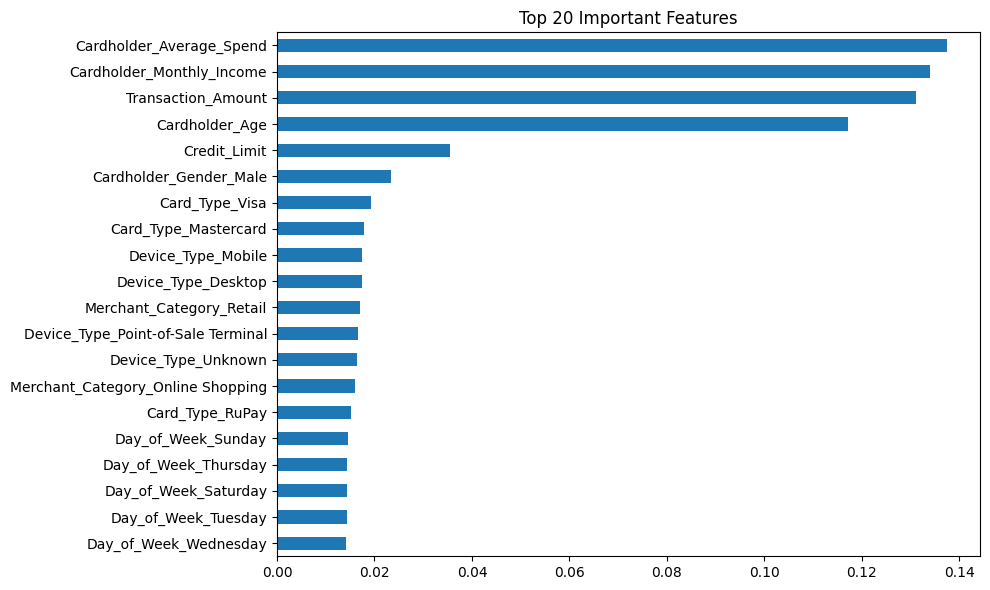

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

X = df_encoded.drop(['Is_Fraudulent', 'Transaction_ID', 'Transaction_DateTime'], axis=1, errors='ignore')
y = df_encoded['Is_Fraudulent']

print("Shape of X before training:", X.shape)
print("Shape of y before training:", y.shape)

# Train a Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False)

# Plot top 20 features
plt.figure(figsize=(10, 6))
top_features[:20].plot(kind='barh')
plt.title('Top 20 Important Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**Recursive Feature Elimination (Optional)**

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

selector = RFE(estimator=RandomForestClassifier(), n_features_to_select=15)
selector.fit(X, y)

# Selected features
selected_features = X.columns[selector.support_]
print("Top selected features:\n", selected_features)

###**b) Remove Irrelevant or Redundant Features**

In [ ]:
X = df_encoded.drop(['Transaction_ID', 'Transaction_DateTime'], axis=1, errors='ignore')

from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.01)
X_var = selector.fit_transform(X)

selected_columns = X.columns[selector.get_support()]
X_reduced = pd.DataFrame(X_var, columns=selected_columns)

print("Remaining features after low-variance filter:\n", selected_columns.tolist())

## **5) Split data into training and testing**

In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(['Is_Fraudulent', 'Transaction_ID', 'Transaction_DateTime'], axis=1, errors='ignore')
y = df_encoded['Is_Fraudulent']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("Train set fraud distribution:\n", y_train.value_counts(normalize=True))
print("\nTest set fraud distribution:\n", y_test.value_counts(normalize=True))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## **6) Feature Scaling**

In [ ]:
numerical_cols = ['Transaction_Amount', 'Cardholder_Age', 'Cardholder_Monthly_Income', 'Cardholder_Average_Spend', 'Credit_Limit']


Apply StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['Transaction_Amount', 'Cardholder_Age', 'Cardholder_Monthly_Income', 'Cardholder_Average_Spend', 'Credit_Limit']
scaler = StandardScaler()

# Fit on training data and transform both train & test
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **7) Build the Machine Learning Model:**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [ ]:
# Define classifiers
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC()
}

# Evaluate models
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)
print(results_df)

                    Model  Accuracy  Precision    Recall  F1 Score
2           Decision Tree     0.618   0.301370  0.330827  0.315412
1             Naive Bayes     0.669   0.284768  0.161654  0.206235
4     K-Nearest Neighbors     0.683   0.289256  0.131579  0.180879
3           Random Forest     0.728   0.200000  0.007519  0.014493
0     Logistic Regression     0.734   0.000000  0.000000  0.000000
5  Support Vector Machine     0.734   0.000000  0.000000  0.000000


**Train & evaluate multiple classifiers**

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC()
}

results = []

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results).sort_values(by='F1 Score', ascending=False)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score
1          Naive Bayes     0.599   0.309859  0.413534  0.354267
2        Decision Tree     0.569   0.244582  0.296992  0.268251
4                  KNN     0.607   0.260377  0.259398  0.259887
0  Logistic Regression     0.626   0.237864  0.184211  0.207627
3        Random Forest     0.700   0.319149  0.112782  0.166667
5                  SVM     0.684   0.276786  0.116541  0.164021


**c) Select the Best Model**

In [ ]:
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

**d) Evaluate Model Performance**

In [ ]:
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

print("Training Classification Report:")
print(classification_report(y_train, y_pred_train))

print("\nTesting Classification Report:")
print(classification_report(y_test, y_pred_test))

Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2934
           1       1.00      1.00      1.00      1066

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000


Testing Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.89      0.80       734
           1       0.25      0.10      0.14       266

    accuracy                           0.68      1000
   macro avg       0.49      0.50      0.47      1000
weighted avg       0.60      0.68      0.63      1000



**e) Validate Using Confusion Matrix**

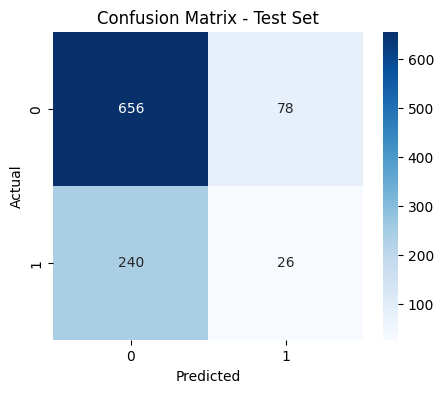

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Test Set")
plt.show()

**Handling Class Imbalance with SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Shape of X_train before SMOTE:", X_train.shape)
print("Shape of X_train after SMOTE:", X_train_resampled.shape)
print("\nValue counts of y_train before SMOTE:\n", y_train.value_counts())
print("\nValue counts of y_train after SMOTE:\n", y_train_resampled.value_counts())

Shape of X_train before SMOTE: (4000, 41)
Shape of X_train after SMOTE: (5868, 41)

Value counts of y_train before SMOTE:
 Is_Fraudulent
0    2934
1    1066
Name: count, dtype: int64

Value counts of y_train after SMOTE:
 Is_Fraudulent
0    2934
1    2934
Name: count, dtype: int64
